[![Open holes - Construction safety](https://www.keithconstruction.ca/wp-content/uploads/2020/09/Construction-Safety-1024x536.png)](https://github.com/BitSpaceDevelopment/CV-Construction-safety-model)

# Train YOLOv8

---
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/BitSpaceDevelopment/CV-Construction-safety-model)
## Use case: Open hole detection
Link to data: https://universe.roboflow.com/northeastern-4sfxe/construction-safety-open-hole-excavation-detection

 This model will be deployed to our Jetson-based edge inference systems for job sites allowing us to monitor and report on unsafe conditions surrounding excavation and earth moving. This model should run on a single-board computer; we will likely combine functionality with the PPE model to determine if somebody is wearing a harness near an unsafe excavation. 

---
## About the model:

⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

---

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

---

## Steps in this training

In this notebook, we are going to cover:

- 1. Set GPU
- 2. Install YOLOv8
- 3. Preparing a custom dataset: Upload, annotate and prepared on Roboflow
- 4. Custom Training
- 5. Validate Custom Model
- 6. Download weights
- 7. Deploy models

---
## Visualization of interactive workflow:
![](https://2486075003-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-M6S9nPJhEX9FYH6clfW%2Fuploads%2FfHpPTWNdCVR9qHQDeskF%2FScreen%20Shot%202022-08-24%20at%2012.35.36%20PM.png?alt=media&token=623927fe-3099-4ccd-8aaa-890bf5c0b03b)
**Let's begin!**
---
---

## 1. Set GPU

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
# Check if we have the access to GPU
!nvidia-smi

Mon Jun 12 01:45:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 2. Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

In [3]:
# Install using pip
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


In [4]:
# Import libraries
from ultralytics import YOLO
from IPython.display import display, Image

## 3. Preparing a custom dataset

We have added data, relabeled, changed annotations, and preprocessed (argumentation) all images for this step on Robotflow. The below code is to download pre-processed dataset from the site, which is compatible with YOLOv8.

In [5]:
!mkdir /content/datasets
%cd /content/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bvgx6NFEHR0zZurL8c9w")
project = rf.workspace("northeastern-4sfxe").project("construction-safety-open-hole-excavation-detection")
dataset = project.version(4).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=01e5396cb68b55f225b10ef54b9961e94fcab02781cbac0b98a2755d1b4703e3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstal

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Construction-Safety---Open-hole-/-Excavation-Detection-4 in yolov8:: 100%|██████████| 3696/3696 [00:01<00:00, 2501.76it/s]


In [6]:
# Check location of dataset
dataset.location

'/content/datasets/Construction-Safety---Open-hole-/-Excavation-Detection-4'

## 4.Training the model
### Some hyper-parameters that we use to tune the model

Here, we are able to pass a number of arguments:
- **img-size:** Define input image size, (default value: [640, 640]).
- **workers:** Define maximum number of dataloader workers (default value: 8).
- **batch-size:** Determine batch size.
- **epochs:** Define the number of training epochs.
- **data:** Our dataset locaiton.
- **model:** The YOLO model configuration file being used.
- **cache:** Cache images for faster training.
- **device:** cuda device, i.e. 0 or 0,1,2,3 or cpu.
- **plots:** Whether to plot training results (True).
- **nms:** Whether to use non-maximum suppression during post-processing (Default is False).
- **patience:** early stop hyper-parameter (Model will stop after N epochs without improvement). In this case, N =20.

In [7]:
%cd /content/

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True cache=True device=0 nms=True patience=20 batch=16

/content
100% 21.5M/21.5M [00:00<00:00, 349MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Construction-Safety---Open-hole-/-Excavation-Detection-4/data.yaml, epochs=200, patience=20, batch=16, imgsz=640, save=True, cache=True, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

**Hyper-parameter summary**:
- `model`: The YOLO model configuration file being used (yolov8s.yaml).
- `data`: Path to the data configuration file (/content/datasets/Open-hole-Detection---Construction-Safety-4/data.yaml).
- `epochs`: The number of training epochs (200).
- `patience`: The number of epochs to wait for early stopping if the validation loss does not improve (20).
- `batch`: Batch size for training (16).
- `imgsz`: Input image size during training (640 pixels).
- `save`: Whether to save the trained model weights (True).
- `cache`: Whether to cache images for faster training (True).
- `device`: Device to be used for training (0 for GPU).
- `workers`: Number of worker threads for data loading (8).
- `project`: The name of the project for saving training results (None).
- `name`: Name of the training run (None).
- `exist_ok`: Whether to allow overwriting existing training run directories (False).
- `pretrained`: Whether to use pre-trained weights (False).
- `optimizer`: The optimizer algorithm used for training (SGD).
- `verbose`: Whether to display verbose training information (True).
- `seed`: Random seed for reproducibility (0).
- `deterministic`: Whether to enable deterministic behavior for better reproducibility (True).
- `single_cls`: Whether to train a single-class object detector (False).
- `image_weights`: Whether to assign different weights to different images during training (False).
- `rect`: Whether to use rectangular training images (False).
- `cos_lr`: Whether to use cosine learning rate decay (False).
- `close_mosaic`: Mosaic box size for close objects (10).
- `resume`: Whether to resume training from a checkpoint (False).
- `overlap_mask`: Whether to overlap masks during training (True).
- `mask_ratio`: Ratio of mask size to image size (4).
- `dropout`: Whether to use dropout regularization (False).
- `val`: Whether to perform validation during training (True).
- `save_json`: Whether to save results in JSON format (False).
- `save_hybrid`: Whether to save hybrid model weights (False).
- `conf`: Confidence threshold for detection (0.001).
- `iou`: IoU (Intersection over Union) threshold for NMS (0.7).
- `max_det`: Maximum number of detections per image (300).
- `half`: Whether to use half-precision floating-point format (False).
- `dnn`: Whether to use deep neural networks (False).
- `plots`: Whether to plot training results (True).
- `source`: Path to the directory containing input images or videos (ultralytics/assets/).
- `show`: Whether to display images during training (False).
- `save_txt`: Whether to save results in TXT format (False).
- `save_conf`: Whether to save confidence images (False).
- `save_crop`: Whether to save cropped detection images (False).
- `hide_labels`: Whether to hide labels in the output (False).
- `hide_conf`: Whether to hide confidence scores in the output (False).
- `vid_stride`: The number of frames to skip between detections in videos (1).
- `line_thickness`: Thickness of bounding box lines in output images (3).
- `visualize`: Whether to visualize training data (False).
- `augment`: Whether to apply data augmentation during training (False).
- `agnostic_nms`: Whether to use agnostic NMS (class-agnostic) during post-processing (False).
- `classes`: List of class names for training (None).
- `retina_masks`: Whether to use retina masks (False).
- `boxes`: Whether to output bounding box coordinates in the results (True).
- `format`: Model output format (torchscript).
- `keras`: Whether to use Keras format for model output (False).
- `optimize`: Whether to optimize the model (False).
- `int8`: Whether to use 8-bit integer quantization (False).
- `dynamic`: Whether to use dynamic tensor shapes (False).
- `simplify`: Whether to simplify the model (False).
- `opset`: The ONNX opset version to use (17).
- `workspace`: Workspace size for model optimization (4).
- `nms`: Whether to use non-maximum suppression during post-processing (True).
- `lr0`: Initial learning rate for the optimizer (0.01).
- `lrf`: Final learning rate for the optimizer (0.01).
- `momentum`: Momentum factor for the optimizer (0.937).
- `weight_decay`: Weight decay factor for the optimizer (0.001).
- `warmup_epochs`: Number of warm-up epochs (3.0).
- `warmup_momentum`: Warm-up momentum factor (0.8).
- `warmup_bias_lr`: Warm-up bias learning rate factor (0.1).
- `box`: Loss weight for bounding box regression (7.5).
- `cls`: Loss weight for class prediction (0.5).
- `dfl`: Loss weight for detection feature learning (1.5).
- `fl_gamma`: Focal loss gamma value (0.0).
- `label_smoothing`: Label smoothing factor (0.0).
- `nbs`: Number of samples per batch (64).
- `hsv_h`: Hue shift range for color augmentation (0.015).
- `hsv_s`: Saturation range for color augmentation (0.7).
- `hsv_v`: Value range for color augmentation (0.4).
- `degrees`: Rotation angle range for augmentation (0.0).
- `translate`: Translation range for augmentation (0.1).
- `scale`: Scale range for augmentation (0.5).
- `shear`: Shear angle range for augmentation (0.0).
- `perspective`: Perspective distortion range for augmentation (0.0).
- `flipud`: Vertical flip probability for augmentation (0.0).
- `fliplr`: Horizontal flip probability for augmentation (0.5).
- `mosaic`: Mosaic probability for augmentation (1.0).
- `mixup`: Mixup probability for augmentation (0.0).
- `copy_paste`: Copy-paste probability for augmentation (0.0).
- `cfg`: Path to the YOLO model configuration file (None).
- `v5loader`: Whether to use the YOLOv5 model loader (False).


## 5. Evaluation of the Model
### 5.1. Plots from model results

In [8]:
# Check all files within the result folder
!ls /content/runs/detect/train/

args.yaml					    train_batch0.jpg
events.out.tfevents.1686535245.c97e4b49148d.4058.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


/content


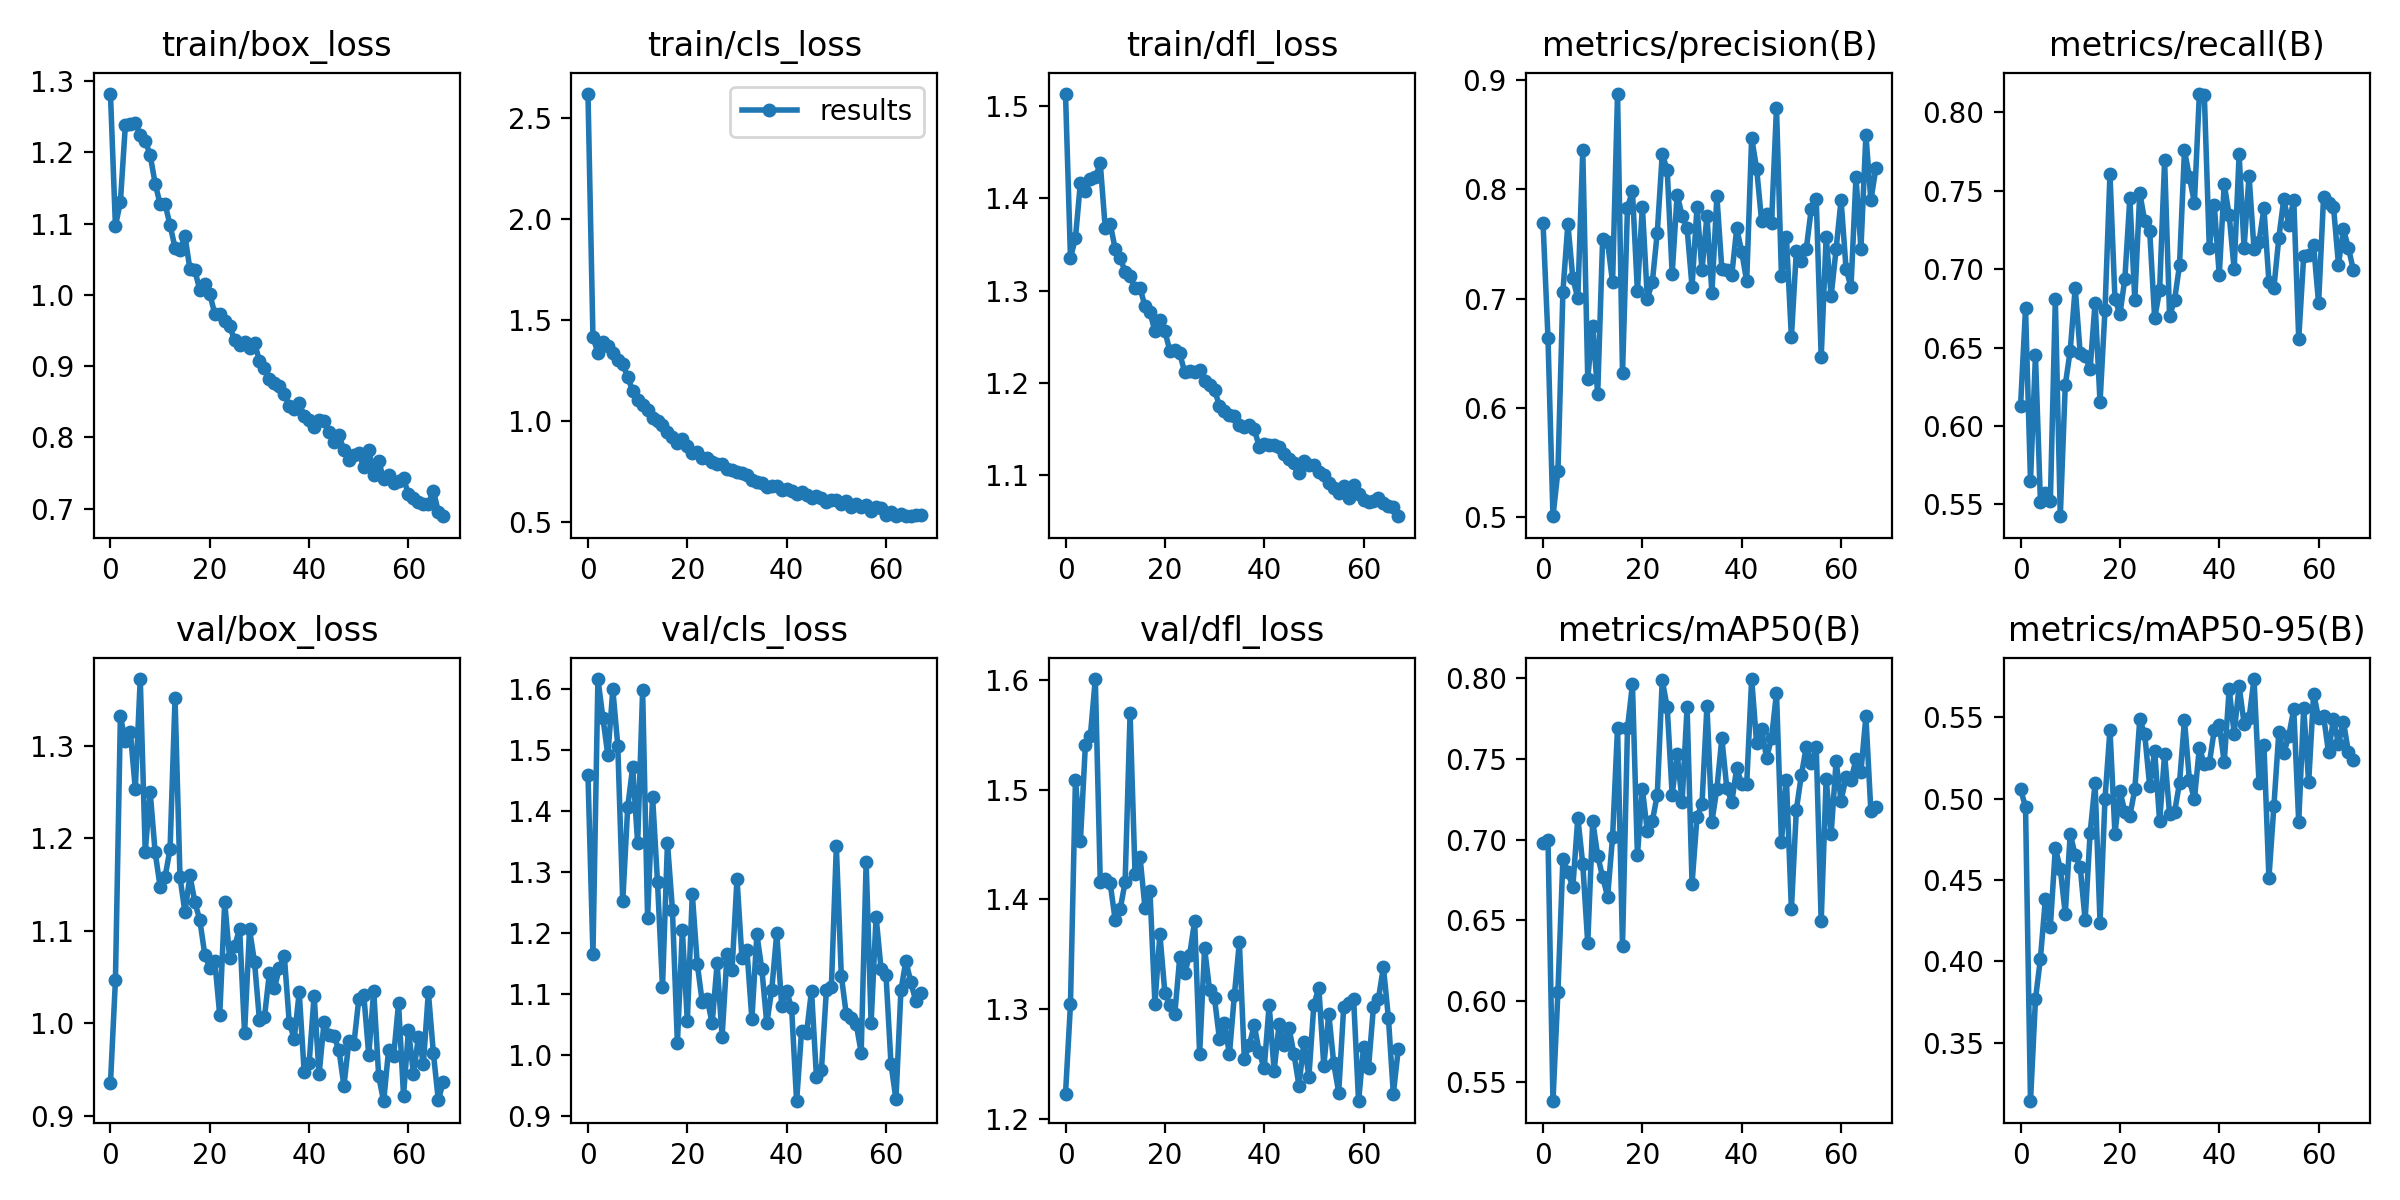

In [10]:
# Performance metrics
%cd /content/
Image(filename=f'/content/runs/detect/train/results.png', width=1200)

### 5.2. Model performance on validation set


In [14]:
%cd /content/

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-12 03:00:25.466009: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 03:00:26.722325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Construction-Safety---Open-hole-/-Excavation-Detection-4/valid/labels.cache... 85 images, 8 backgrounds, 0 corrupt: 100% 85/85 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.25it/s]
                   all         85        166      0.874      0.712      0.791      0.57

### 5.3. Model inference
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [17]:
%cd /content/
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.1 source={dataset.location}/test/images save=True

/content
2023-06-12 03:01:51.523156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 03:01:52.404798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/35 /content/datasets/Construction-Safety---Open-hole-/-Excavation-Detection-4/test/images/16_jpg.rf.402c681211cb280d95a652826f9080d4.jpg: 640x640 3 Safety-cones, 16.3ms
image 2/35 /content/datasets/Construction-Safety---Open-hole-/-Excavation-Detection-4/test/images/1826470_jpg.rf.fcd289c53ef10ef6790e3c173b97be7f.jpg: 640x640 1 open-hole, 16.3ms
image 3/35 /content/datasets/Co

**NOTE:** Let's take a look at few results.

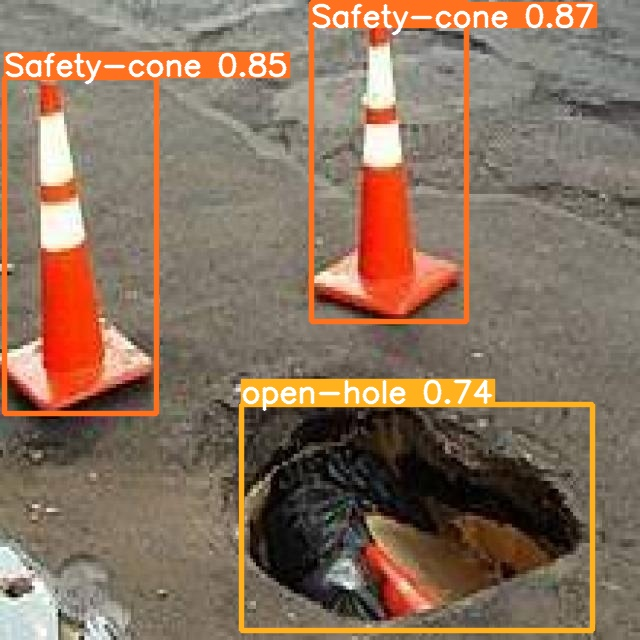

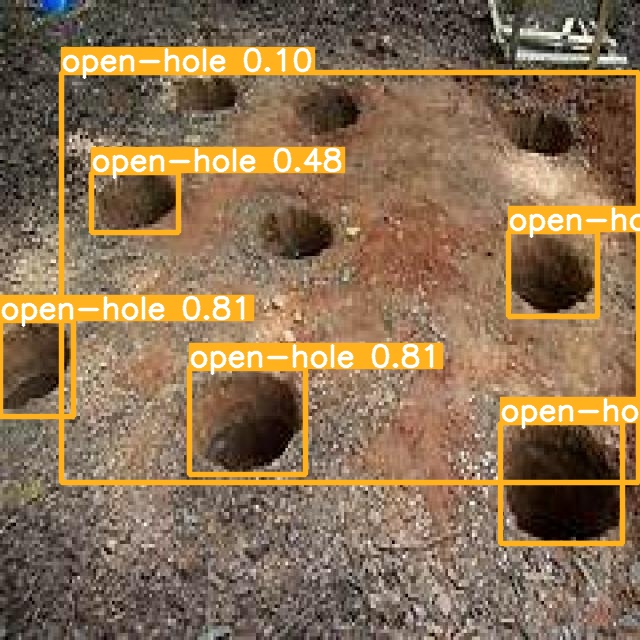

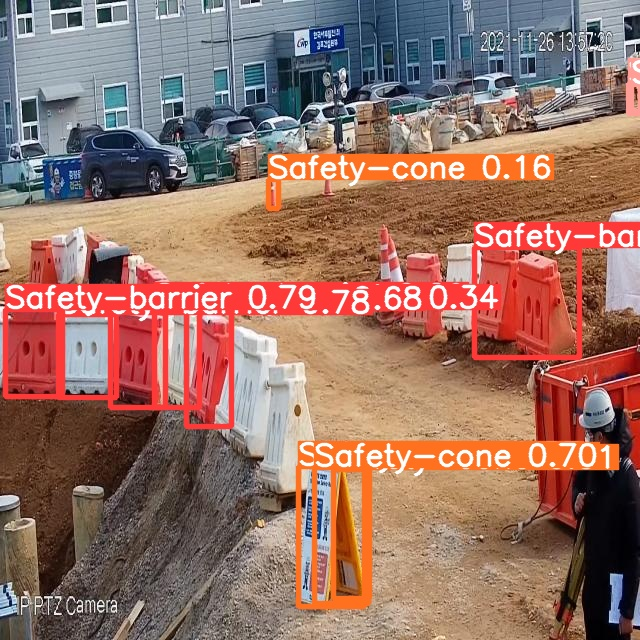

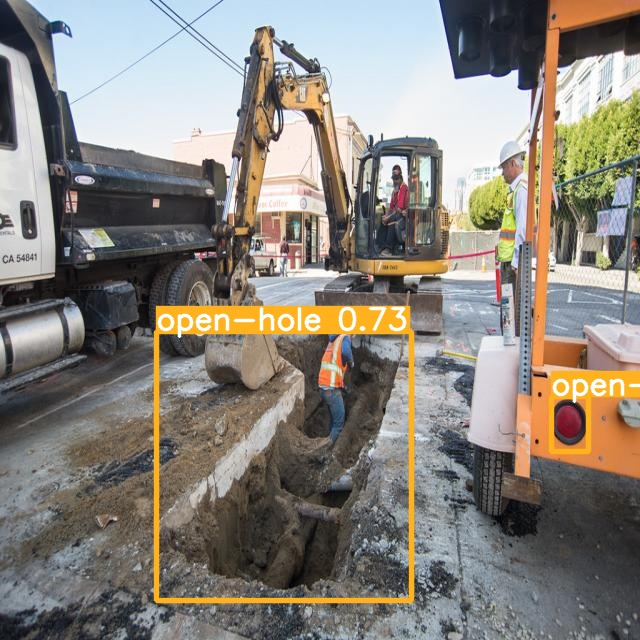

In [19]:
#Display inference on ALL test images
import glob
from IPython.display import Image, display

i = 0
limit = 4 # max images to print is 5
for imageName in glob.glob('/content/runs/detect/predict/*.jpg'): 
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1

## 6. Export model weights for later use

Export the model weights and save them to use later.

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## 7.Deploy on Roboflow

Upload model weights back to Roboflow for inference.

In [21]:
# Setup access to your workspace
from roboflow import Roboflow
rf = Roboflow(api_key="bvgx6NFEHR0zZurL8c9w")
project = rf.workspace("northeastern-4sfxe").project("construction-safety-open-hole-excavation-detection")
version = project.version(4)
version.deploy("yolov8", "/content/runs/detect/train/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/northeastern-4sfxe/construction-safety-open-hole-excavation-detection/deploy/4
Share your model with the world at: https://universe.roboflow.com/northeastern-4sfxe/construction-safety-open-hole-excavation-detection/model/4


# Thank you!